In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

from contrastive.data.utils import read_labels
from contrastive.evaluation.train_multiple_classifiers import compute_indicators

In [2]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
config = {
    'subject_column_name': 'long_name',
    'label_names': ["Right_PCS"],
    'training_embeddings': "/neurospin/dico/agaudin/Runs/05_rigourous/Output/nb_epochs/2023-03-14/12-49-43_1/cingulate_ACCpatterns_1_embeddings/full_embeddings.csv"
}

In [4]:
model = 'gyrification/2023-03-20/14-25-36_1'


embeddings = pd.read_csv(f"/neurospin/dico/agaudin/Runs/05_rigourous/Output/{model}/cingulate_ACCpatterns_1_embeddings/full_embeddings.csv")
embeddings.sort_values(by='ID', inplace=True, ignore_index=True)

labels = pd.read_csv(f"/neurospin/dico/agaudin/Runs/05_rigourous/Output/{model}/cingulate_ACCpatterns_1_embeddings/cross_val_predicted_probas.csv")
labels.sort_values(by='Subject', inplace=True, ignore_index=True)

X = embeddings.drop('ID', axis = 1).values
Y = labels.label.values

# Long story short: they are consistant

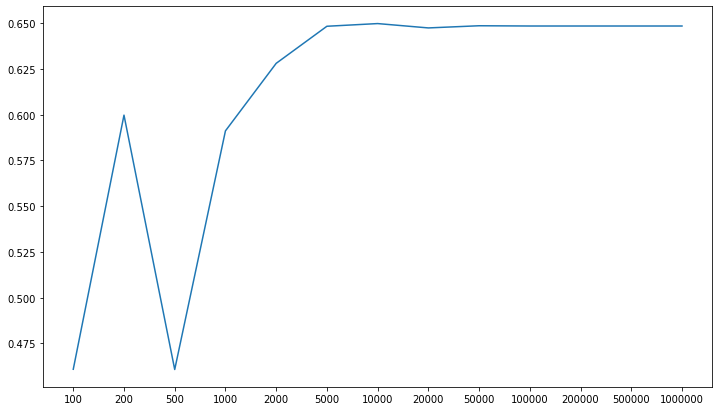

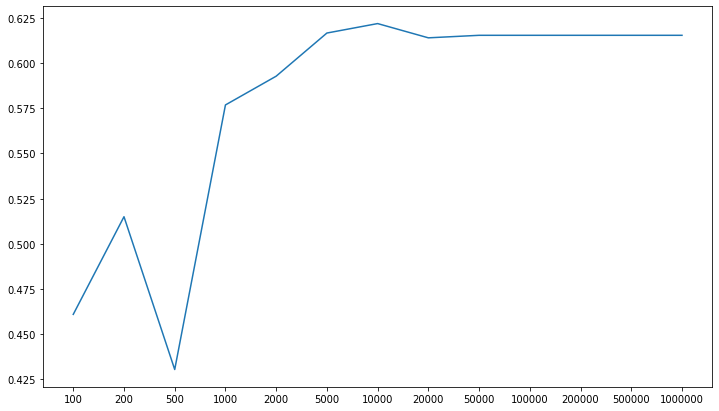

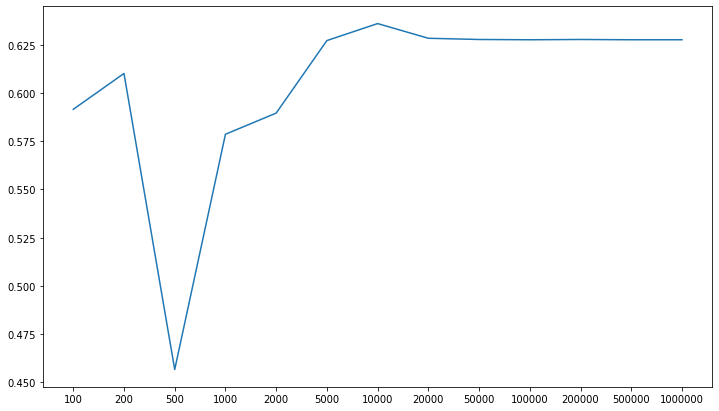

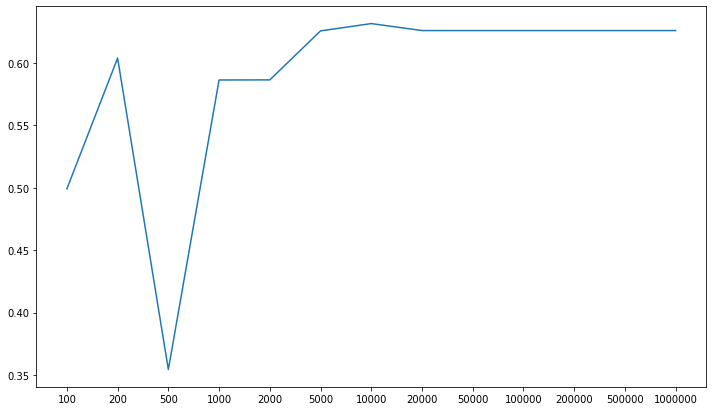

In [55]:
epochs_svm = [100,200,500,1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000]


for i in [51,66,42,666]:
    aucs = []
    for class_max_epochs in epochs_svm:

        svc = SVC(kernel='linear', probability=True, max_iter=class_max_epochs, random_state=i)

        labels_proba = cross_val_predict(svc, X, Y, cv=5, method='predict_proba')

        _, roc_auc, _ = compute_indicators(labels.label, labels_proba)

        aucs.append(roc_auc)

    plt.figure(figsize=(12,7))
    plt.plot(range(len(epochs_svm)), aucs)
    plt.xticks(ticks=range(len(epochs_svm)), labels=epochs_svm)
    plt.show()

# Noise resistance (they are)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


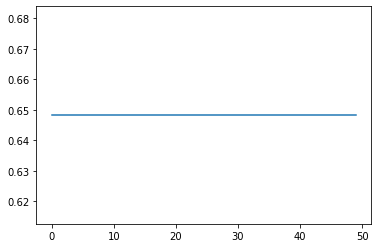

0.6483086385239027 0.0


In [14]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

aucs = []
for i in range(50):
    print(i)
    noise = np.random.normal(scale=10**-1, size=scaled_X.shape)
    noised_X = scaled_X + noise

    svc = SVC(kernel='linear', probability=True, max_iter=5000, random_state=51)
    labels_proba = cross_val_predict(svc, X, Y, cv=5, method='predict_proba')
    _, roc_auc, _ = compute_indicators(labels.label, labels_proba)

    aucs.append(roc_auc)

plt.plot(aucs)
plt.show()

print(np.mean(aucs), np.std(aucs))

